In [60]:
import scipy
import pandas as pd
import networkx as nx
df = pd.read_csv('imdb_top_1000.csv')

print(df)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II  

[]


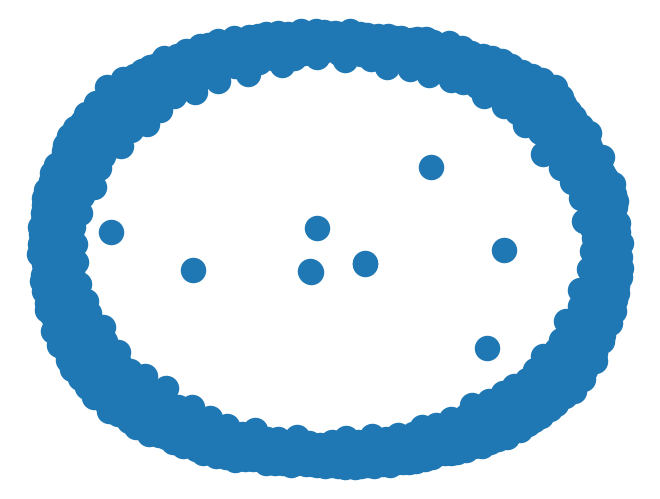

In [90]:
rows = []
for index, row in df.iterrows():
    rows.append((row["Series_Title"], [row["Star1"], row["Star2"], row["Star3"], row["Star4"]]))

G = nx.Graph()

titles = [movie[0] for movie in rows]
for title in titles:
    #print(title)
    G.add_node(title)
    
for i in range(len(titles)):
    for j in range(i+1, len(title)):
        weight = len(set(rows[i][1]).intersection(set(rows[j][1])))
        if weight >= 1:
            G.add_edge(rows[i][0], rows[j][0], weight=weight)
        
nx.draw(G)
print(G.edges("Star Wars"))